# Сборный проект № 1

# Оглавление

1. [Описание проекта](#one)

2. [Загрузка данных и знакомство с ними](#two)

3. [Подготовка данных](#three)

4. [Исследовательский анализ данных](#four)

5. [Портрет пользователя каждого региона](#five)

6. [Проверка гипотез](#six)

7. [Общий вывод](#seven)

## Описание проекта <a id='one'></a>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Загрузка данных и знакомство с ними <a id='two'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()#общая информация 
display(data.head())
display(data.tail())
data.columns#контроль названий столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

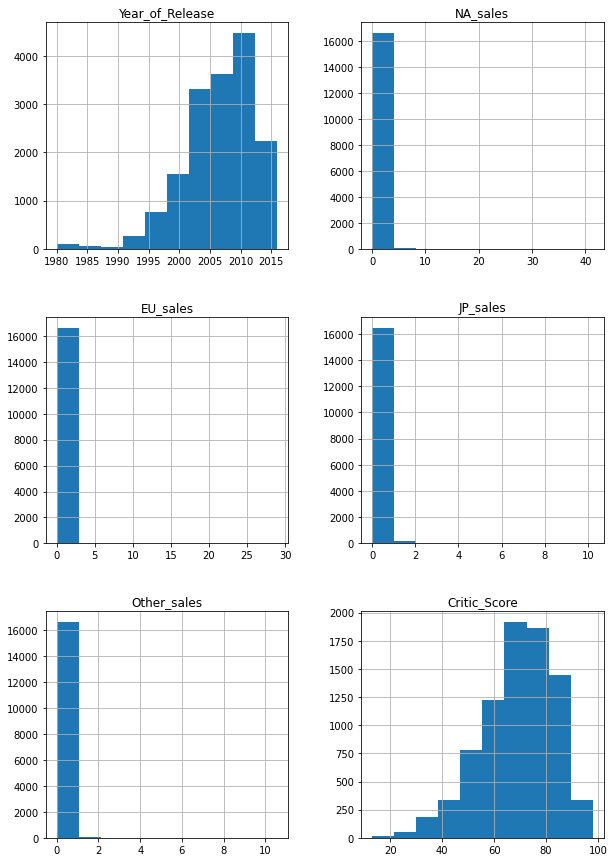

In [3]:
data.hist(figsize=(10, 15))#гистограммы по всей таблице
plt.show()

**Вывод: всего в датафрейме 16715 строк. Названия всех столбцов необходимо привести к строчному виду (пробелов в названиях нет, "змеиный" регистр соблюден). Нет пропущенных значений в столбцах с платформой и продажами в Северной Америке, Европе, Японии, других странах. В остальных столбцах есть пропущенные значения. Необходимо заменить типы данных в некоторых столбцах.**    

## Подготовка данных <a id='three'></a>

Переименование столбцов:

In [4]:
data = data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 
                            'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales',
                            'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Работа с пропущенными значениями и замена типов данных:

In [5]:
display(data.isna().sum())
data_before_clean = data['platform'].count()#количество строк до удаления

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
first_year = data['year_of_release'].min()
last_year = data['year_of_release'].max()
print(f'В датафрейме представлены данные с {first_year} до {last_year}, таким образом за {last_year-first_year} лет.')

В датафрейме представлены данные с 1980.0 до 2016.0, таким образом за 36.0 лет.


In [7]:
percent_of_na_year = data['year_of_release'].isna().sum() / data['platform'].count()
print(f'Число строк с пропущенным годом выпуска составляет {percent_of_na_year:.1%}')

Число строк с пропущенным годом выпуска составляет 1.6%


Для экономии вычислительной памяти переведем значения столбца `year_of_release` в целые числа, однако первоначально удалим строки с пропущенным годом выпуска, поскольку они занимают всего 1,6 % от всех данных. Также удалим строки с пропущенными названием и жанром игры, поскольку их крайне мало.

In [8]:
data = data.dropna(subset=['year_of_release', 'name', 'genre']).reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].astype('int') 
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Ознакомимся с оставшимися пропущенными значениями:

In [9]:
percent_of_na_user_score = data['user_score'].isna().sum() / data['platform'].count()
print(f'Число строк с пропущенным рейтингом составляет {percent_of_na_user_score:.1%}, а для столбцов с оценками критиков и рейтингом еще больше.')

Число строк с пропущенным рейтингом составляет 40.2%, а для столбцов с оценками критиков и рейтингом еще больше.


In [10]:
display(data['critic_score'].unique())
display(data['user_score'].unique())
data['rating'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'].count()

2376

В данных 2376 строк со оценкой пользователей `tbd`, вероятно, это просто пропущенные значения и можно их заменить на nan. Затем изменим тип данных для столбца на вещественный.

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = data['user_score'].astype('float')
display(data['user_score'].unique())
data.info()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Пропуски в столбцах с оценками и рейтингом встречаются очень часто, поэтому удалить строки с пропусками нельзя, а заполнить каким-либо значением не представляется возможным, поскольку это может повлиять на результат. Пропуски в значениях могли возникнуть в результате того, что когда еще были старые игры им не могли ставить оценки и рейтинг, а потом они вышли из использования. Также могут быть пропуски для новых игр, потому что им не успели поставить оценки и рейтинг.

Проверка явных дубликатов:

In [13]:
data.duplicated().sum()

0

Явных дубликатов в датафрейме нет.

Проверка неявных дубликатов:

In [14]:
data_dup = data[['name', 'platform', 'year_of_release']]
duplicated_data_dup = data_dup[data_dup.duplicated()].head()
duplicated_data_dup

,name,platform,year_of_release
15969,Madden NFL 13,PS3,2012


Отмечается дублирование игры `Madden NFL 13` на `PS3` в `2012` года. Проверим это в основном датафрейме.

In [15]:
data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3') & (data['year_of_release'] == 2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Отмечается различие только в столбце `eu_sales`. Сложим выручку по Европе и удалим строку с индексом 15969.

In [16]:
data.loc[600, 'eu_sales'] = data.loc[600, 'eu_sales'] + data.loc[15969, 'eu_sales']
data = data.drop(15969).reset_index(drop=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Добавим столбец с суммарными продажами по всем регионам:

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,7982.000000,7462.000000,16443.000000
mean,2006.485921,0.264028,0.145939,0.078492,0.047597,68.992608,7.126548,0.536056
std,5.875546,0.818400,0.506731,0.311109,0.188011,13.920049,1.499429,1.558829
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [18]:
data_after_clean = data['platform'].count()#количество строк после удаления
clean = 1-data_after_clean/data_before_clean
print(f'После обработки данных из датафрейма было удалено {clean:.1%} первоначальных данных.')

После обработки данных из датафрейма было удалено 1.6% первоначальных данных.


**Вывод: в результате обработки данных были переименованы столбцы. Также были удалены строки с пропущенными значениями в столбцах `year_of_release`, `name`, `genre`. Таким образом, было удалено 1,6 % первоначальных данных. Пропущенные значения остались только в столбцах `critic_score`, `user_score`, `rating`, их заполнение не представляется возможным. Пропуски в значениях могли возникнуть в результате того, что когда еще были старые игры им не могли ставить оценки и рейтинг, а потом они вышли из использования. Также могут быть пропуски для новых игр, потому что им не успели поставить оценки и рейтинг. В столбце `user_score` значения `tbd`, вероятнее всего являлись пропусками, поэтому их заменили на вещественное `nan`. Также были изменены типы данных в столбцах `year_of_release`, `user_score`. Явных дубликатов в датафрейме не выявлено, был выявлен один неявный дубликат. Помимо этого был добавлен столбец с суммарными продажами по всем регионам.**

## Исследовательский анализ данных <a id='four'></a>

Количество выпущенных игр за каждый год:

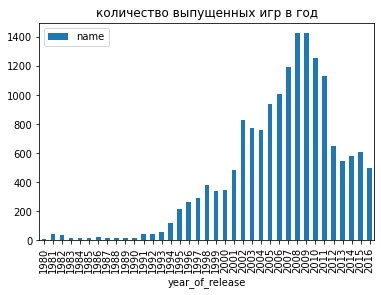

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [19]:
games_for_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
games_for_year.plot(x='year_of_release', y='name', kind='bar', title='количество выпущенных игр в год')
plt.show()
games_for_year

До 1994 года выпускалось менее 100 игр в год. Затем, до 2006 года, выпускалось менее 1000 игр в год. С 2006 по 2011 выпускалось более 1000 игр в год. В 2012 году произошло резкое снижение количества выпущенных игр в год (до 653) и затем, вплоть до 2016 года, количество игр в год не превышало 606. Данные до 1994 году могут быть не столь важны.

Изменение продаж по платформам:

In [20]:
platform_for_total_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
platform_for_total_sales


,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Платформами с наибольшими суммарными продажами являются: `PS2`, `X360`, `PS3`, `Wii`, `DS`.

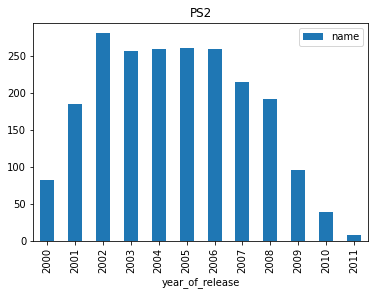

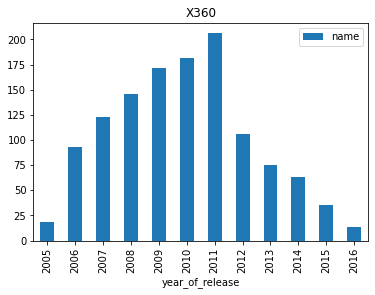

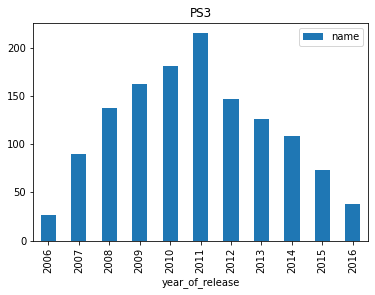

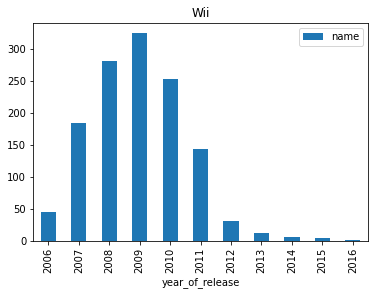

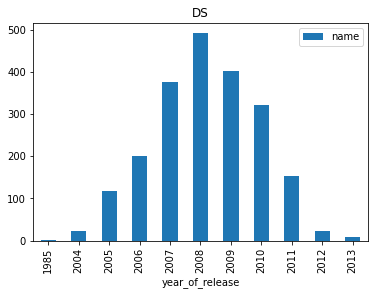

In [21]:
platform_for_total_sales_top = platform_for_total_sales.loc[platform_for_total_sales['total_sales'] > 800] #срез топовых платформ
list_of_top_platform = platform_for_total_sales_top['platform'].unique() #список топовых платформ
for i in list_of_top_platform:
    top_platform_visual = data.loc[data['platform'] == i].pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
    top_platform_visual.plot(x='year_of_release', y='name', kind='bar')
    plt.title(i)

Большинство топовых платформ появились после 2000 года. В среднем, они существуют 10 лет и более. На пик по продажам они выходят через 3-6 лет. Значит актульным периодом возьмем данные с 2013 года, чтобы подобрать платформы, которые будут расти или не снижатсья и в 2017 году.

Уберем из датафрейма данные до 2006 года:

In [22]:
data_after_2013 = data.loc[data['year_of_release'] >= 2013]
data_after_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [23]:
data_after_2013_top = data_after_2013.pivot_table(index='platform', values='total_sales', aggfunc=['sum']).reset_index()
data_after_2013_top.columns=['platform', 'total_sales']
data_after_2013_top = data_after_2013_top.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
data_after_2013_top


,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


Возьмем топ-10 платформ. C 2013 года лидируют по продажам `PS4`, `PS3`, `XOne`, `3DS`, `X360`, `WiiU`, `PC`, `PSV`, `Wii`, `PSP`.

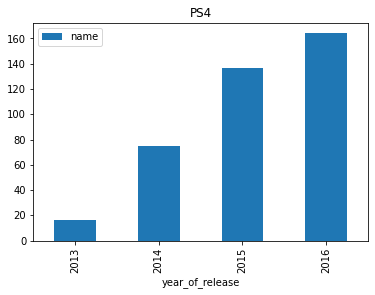

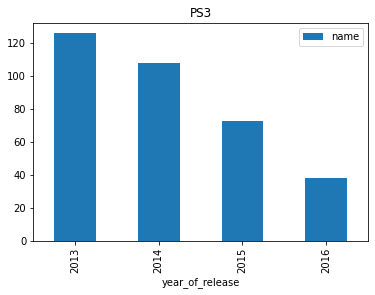

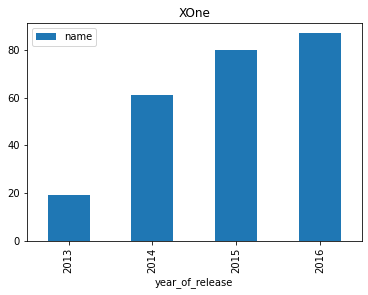

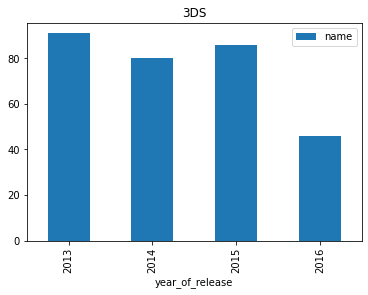

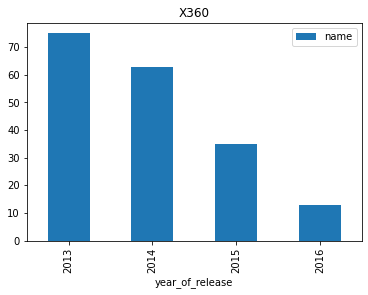

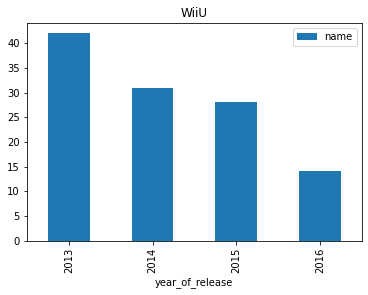

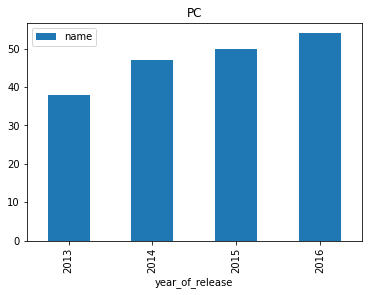

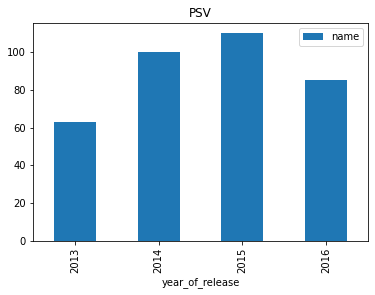

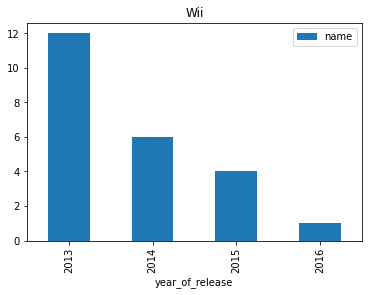

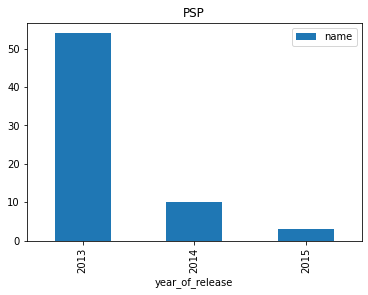

In [24]:
data_after_2013_top10 = data_after_2013_top.loc[data_after_2013_top['total_sales'] > 2] #срез топовых платформ после 2013 года
list_of_data_after_2013_top10 = data_after_2013_top10['platform'].unique() #список топовых платформ
for i in list_of_data_after_2013_top10:
    top10_platform_visual = data_after_2013.loc[data_after_2013['platform'] == i].pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
    top10_platform_visual.plot(x='year_of_release', y='name', kind='bar')
    plt.title(i)

Продажи `PS3`, `X360`, `WiiU`, `Wii`, `PSP` падают. Потенциально прибыльными можно считать `PS4`, `XOne`, `3DS`, `PC`, `PSV`. 

(0.0, 2.0)

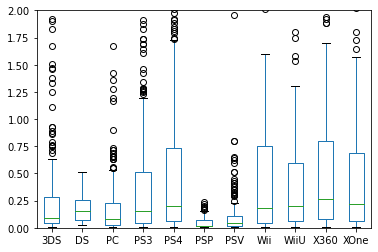

In [25]:
data_after_2013.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').plot(kind='box')
plt.ylim(0, 2)

Наибольшими значениями межквартильного размаха характеризуются платформы `PS4`, `X360`, `Wii`. Для `DS` вообще нет выбросов, возможно, для нее производят не так много игр. Наибольшим медианным значением характеризуется `X360`, наименьшим - `PSP`.

Влияние отзывов пользователей и критиков на продажи для самой популярной платформы `PS4`:

0.40656790206178095

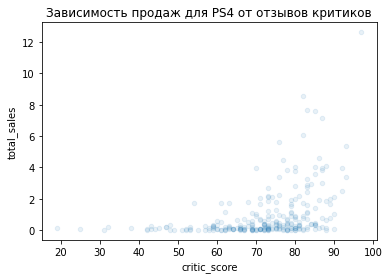

In [26]:
data_after_2013_ps_4 = data_after_2013.loc[data_after_2013['platform'] == 'PS4'].reset_index()
data_after_2013_ps_4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.1, title='Зависимость продаж для PS4 от отзывов критиков')
data_after_2013_ps_4['critic_score'].corr(data_after_2013_ps_4['total_sales'])

-0.031957110204556376

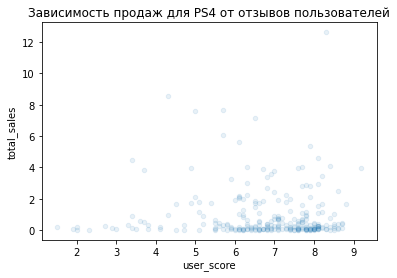

In [27]:
data_after_2013_ps_4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.1, title='Зависимость продаж для PS4 от отзывов пользователей')
data_after_2013_ps_4['user_score'].corr(data_after_2013_ps_4['total_sales'])

Зависимость между отзывами критиков и продажами для `PS4` достаточно сильная и она прямая. Зависимости между продажами и отзывами пользователей нет.

Проведем аналогичные манипуляции для пары потенциально прибыльных платформ в 2017 году `3DS`, `XOne`.

0.3570566142288103

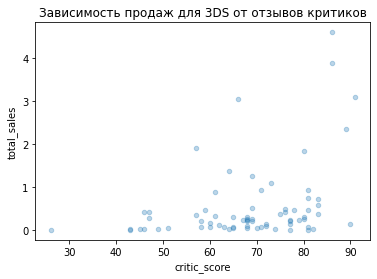

In [28]:
data_after_2013_3_ds = data_after_2013.loc[data_after_2013['platform'] == '3DS'].reset_index()
data_after_2013_3_ds.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, title='Зависимость продаж для 3DS от отзывов критиков')
data_after_2013_3_ds['critic_score'].corr(data_after_2013_3_ds['total_sales'])

0.24150411773563016

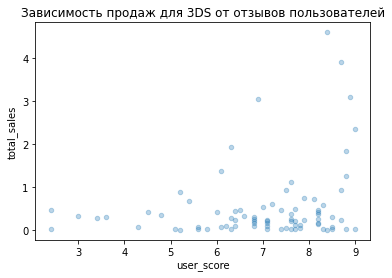

In [29]:
data_after_2013_3_ds.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, title='Зависимость продаж для 3DS от отзывов пользователей')
data_after_2013_3_ds['user_score'].corr(data_after_2013_3_ds['total_sales'])

0.4169983280084017

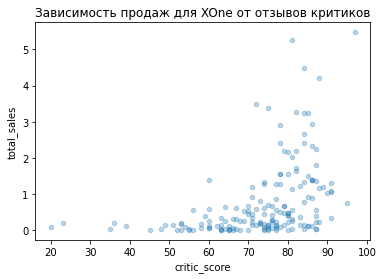

In [30]:
data_after_2013_xone = data_after_2013.loc[data_after_2013['platform'] == 'XOne'].reset_index()
data_after_2013_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, title='Зависимость продаж для XOne от отзывов критиков')
data_after_2013_xone['critic_score'].corr(data_after_2013_xone['total_sales'])

-0.06892505328279414

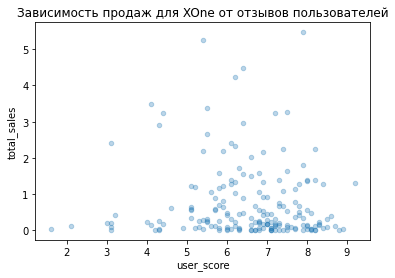

In [31]:
data_after_2013_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, title='Зависимость продаж для XOne от отзывов пользователей')
data_after_2013_xone['user_score'].corr(data_after_2013_xone['total_sales'])

Сравнив получившиеся значения корреляции для `3DS`, `XOne` с `PS4`, можно отметить, что зависимость продаж для разных платформ в зависимости от оценки критиков есть. Зависимость для продаж от оценки пользователей либо незначительна, либо ее вовсе нет. 

Распределение игр по жанрам:

In [32]:
data_after_2013_genre = data_after_2013.pivot_table(index='genre', values='name', aggfunc='count').reset_index()
data_after_2013_genre.sort_values(by='name', ascending=False).reset_index(drop=True)

,genre,name
0,Action,766
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,155
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


Больше 200 игр отмечается в жанрах `Action`, `Role-Playing`, `Adventure`, `Sports`. Наименее популярные игры в жанрах `Simulation`, `Strategy`, `Puzzle`.

In [33]:
data_after_2013_genre_total_sales = data_after_2013.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median']).reset_index()
data_after_2013_genre_total_sales
#data_after_2013_genre_total_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

,genre,sum,mean,median
,,total_sales,total_sales,total_sales
0,Action,321.87,0.420196,0.110
1,Adventure,23.64,0.096490,0.030
2,Fighting,35.31,0.441375,0.125
3,Misc,62.82,0.405290,0.100
4,Platform,42.63,0.576081,0.225
5,Puzzle,3.17,0.186471,0.060
6,Racing,39.89,0.469294,0.120
7,Role-Playing,145.89,0.499623,0.125
8,Shooter,232.98,1.245882,0.450


Наибольшее количество прибыли отмечается в жанрах `Action`, `Shooter`, `Sports`, несмотря на то, что последние два находятся на 5 и 4 местах по количеству существующих игр среди всех. По среднему и медианному значениям наиболее прибыльным является жанр - `Shooter`, наименее - `Adventure`.

**Вывод:**
- Больше 100 игр в год стали выпускать после 1994 года. Больше 1000 - после 2006 года. В 2012 году произошел резкий спад выпуска игр;

- Большинство платформ с максимальными продажами для них появились после 2000 года;

- Для дальнейшей аналитики был выбран актуальный период с 2013 года, поскольку на пик по продажам платформы выходят через 3-6 лет, а нам нужен прогноз на 2017 год;

- Потенциально прибыльными платформами по данным обновленного датафрема можно считать платформы `PS4`, `XOne`, `3DS`, `PC`, `PSV`, поскольку продажи для них либо возрастают, либо снижаются не столь стремительно как для остальных платформ;

- Зависимость продаж для разных платформ в зависимости от оценки критиков существует и она прямая. Зависимость для продаж от оценки пользователей либо незначительна, либо ее вовсе нет;

- Больше 200 игр отмечается в жанрах `Action`, `Role-Playing`, `Adventure`, `Sports`. Наименее популярные игры в жанрах `Simulation`, `Strategy`, `Puzzle`;

- Наиболее прибыльным является жанр - `Shooter`, наименее - `Adventure`. 

## Портрет пользователя каждого региона <a id='five'></a>

Самые популярные платформы:

In [34]:
#для Северной Америки
data_after_2013_platform_na = data_after_2013.pivot_table(index='platform', values='na_sales', aggfunc='sum')
display(data_after_2013_platform_na.sort_values(by='na_sales', ascending=False).head())
#для Европы 
data_after_2013_platform_eu = data_after_2013.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
display(data_after_2013_platform_eu.sort_values(by='eu_sales', ascending=False).head())
#для Японии
data_after_2013_platform_jp = data_after_2013.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
data_after_2013_platform_jp.sort_values(by='jp_sales', ascending=False).head()

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


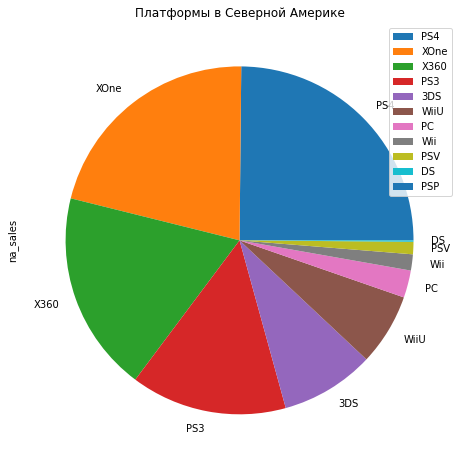

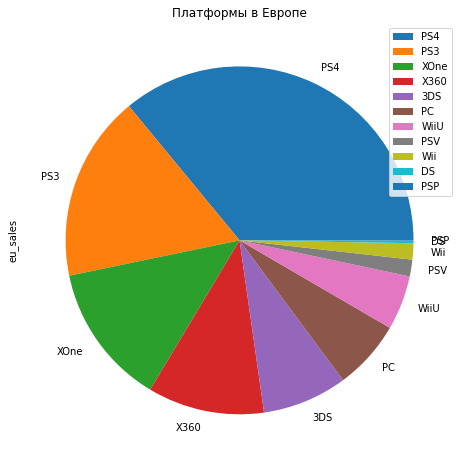

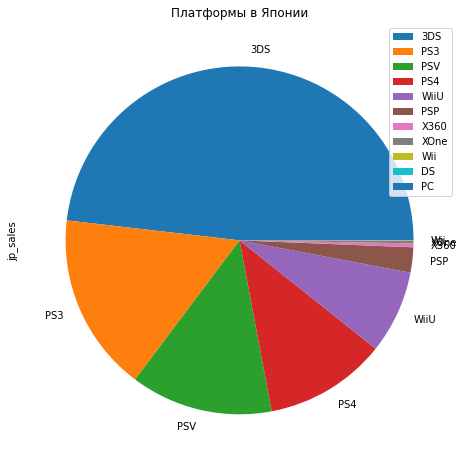

In [35]:
data_after_2013_platform_na.sort_values(by='na_sales', ascending=False).plot(kind='pie', figsize=(8,8), y = 'na_sales', title='Платформы в Северной Америке')
data_after_2013_platform_eu.sort_values(by='eu_sales', ascending=False).plot(kind='pie', figsize=(8,8), y = 'eu_sales', title='Платформы в Европе')
data_after_2013_platform_jp.sort_values(by='jp_sales', ascending=False).plot(kind='pie', figsize=(8,8), y = 'jp_sales', title='Платформы в Японии')

plt.show()

Для Японии отличается наиболее популярная платформа от Северной Америки и Европы (у них одинаковая). Вероятно, она производится в Азии.

Самые популярные жанры:

In [36]:
#для Северной Америки
data_after_2013_genre_na = data_after_2013.pivot_table(index='genre', values='na_sales', aggfunc='sum')
display(data_after_2013_genre_na.sort_values(by='na_sales', ascending=False).head())
#для Европы 
data_after_2013_genre_eu = data_after_2013.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
display(data_after_2013_genre_eu.sort_values(by='eu_sales', ascending=False).head())
#для Японии
data_after_2013_genre_jp = data_after_2013.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
data_after_2013_genre_jp.sort_values(by='jp_sales', ascending=False).head()

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


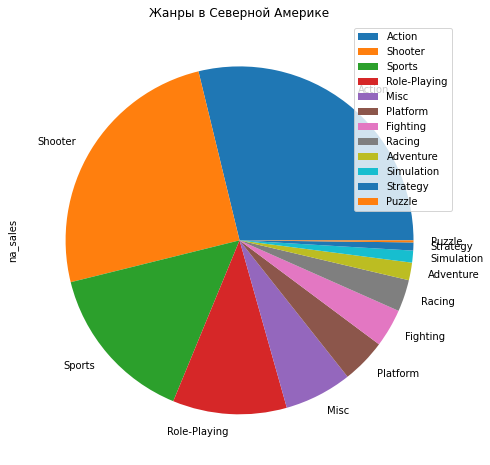

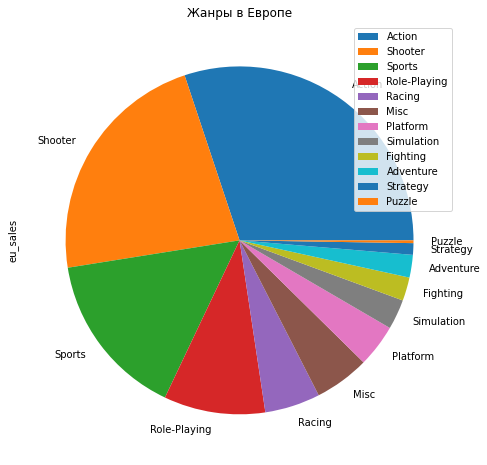

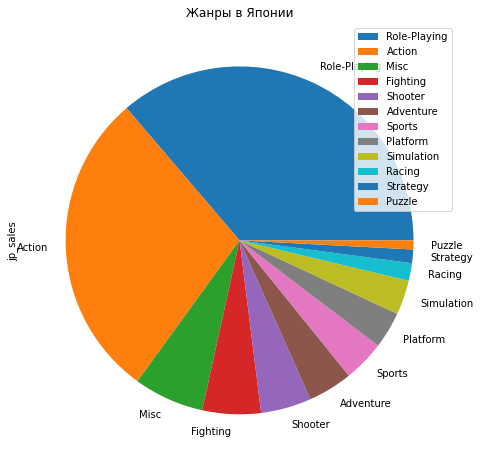

In [37]:
data_after_2013_genre_na.sort_values(by='na_sales', ascending=False).plot(kind='pie', figsize=(8,8), y = 'na_sales', title='Жанры в Северной Америке')
data_after_2013_genre_eu.sort_values(by='eu_sales', ascending=False).plot(kind='pie', figsize=(8,8), y = 'eu_sales', title='Жанры в Европе')
data_after_2013_genre_jp.sort_values(by='jp_sales', ascending=False).plot(kind='pie', figsize=(8,8), y = 'jp_sales', title='Жанры в Японии')

plt.show()

Для Северной Америки и Европы практически одинаковые наиболее популярные жанры. Для Японии наиболее популярный жанр отличается, вероятнее всего, из-за другой культуры.

Влияние рейтинга ESRB на продажи в отдельном регионе:

In [38]:
#для Северной Америки
data_after_2013_rating_na = data_after_2013.pivot_table(index='rating', values='na_sales', aggfunc='sum')
display(data_after_2013_rating_na.sort_values(by='na_sales', ascending=False).head())
#для Европы 
data_after_2013_rating_eu = data_after_2013.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
display(data_after_2013_rating_eu.sort_values(by='eu_sales', ascending=False).head())
#для Японии
data_after_2013_rating_jp = data_after_2013.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
data_after_2013_rating_jp.sort_values(by='jp_sales', ascending=False).head()

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


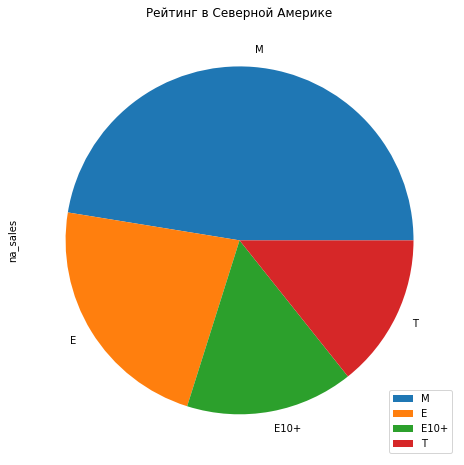

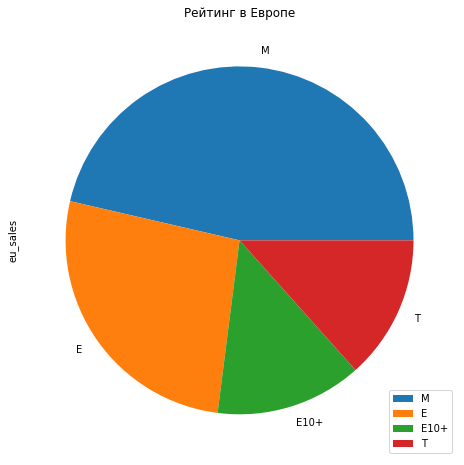

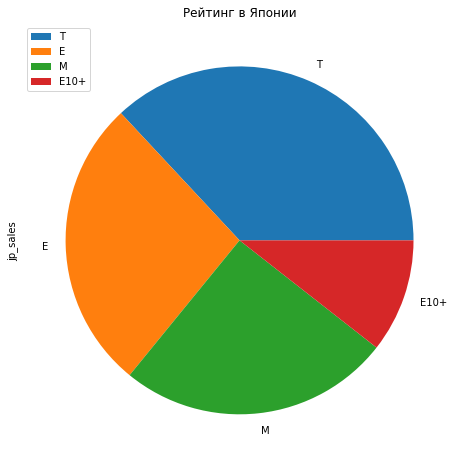

In [39]:
data_after_2013_rating_na.sort_values(by='na_sales', ascending=False).plot(kind='pie', figsize=(8,8), y = 'na_sales', title='Рейтинг в Северной Америке')
data_after_2013_rating_eu.sort_values(by='eu_sales', ascending=False).plot(kind='pie', figsize=(8,8), y = 'eu_sales', title='Рейтинг в Европе')
data_after_2013_rating_jp.sort_values(by='jp_sales', ascending=False).plot(kind='pie', figsize=(8,8), y = 'jp_sales', title='Рейтинг в Японии')

plt.show()

Для Северной Америки и Европы схожее распределение продаж в зависимости от рейтинга. В Японии, в отличии от других регионов, большей популярностью пользуются продажи с рейтингом `T`, чем `M`.

**Вывод: в Японии отличается наиболее популярная платформа (вероятно, она производится в Азии) от Северной Америки и Европы (у них одинаковая). Для Северной Америки и Европы практически одинаковые наиболее популярные жанры. Для Японии наиболее популярный жанр отличается. Для Северной Америки и Европы схожее распределение продаж в зависимости от рейтинга. В Японии, в отличии от других регионов, большей популярностью пользуются продажи с рейтингом `T`, чем `M`.**

## Проверка гипотез <a id='six'></a>

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

`Нулевая гипотеза`: средние пользовательские рейтинги платформ Xbox One и PC равны.

`Альтернативная гипотеза`: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [40]:
xbox_one = data_after_2013.loc[data_after_2013['platform'] == 'XOne'].reset_index()
xbox_one['user_score'] = xbox_one['user_score'].fillna(-1)#заполним NaN заглушками -1
xbox_one = xbox_one.loc[xbox_one['user_score'] >= 0]['user_score'].reset_index(drop=True)

pc = data_after_2013.loc[data_after_2013['platform'] == 'PC'].reset_index()
pc['user_score'] = pc['user_score'].fillna(-1)#заполним NaN заглушками -1
pc = pc.loc[pc['user_score'] >= 0]['user_score'].reset_index(drop=True)

In [41]:
alpha = 0.05
result = st.ttest_ind(xbox_one, pc, equal_var=False)
print(f'p-value: {result.pvalue}')
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.14759594013430463
Нет оснований отвергнуть нулевую гипотезу


Значение p-value больше заданного уровня значимости. Есть основание говорить, что средние пользовательские рейтинги платформ Xbox One и PC равны.

Средние пользовательские рейтинги жанров Action  и Sports разные:

`Нулевая гипотеза`: средние пользовательские рейтинги жанров Action и Sports одинаковые.

`Альтернативная гипотеза`: средние пользовательские рейтинги жанров Action и Sports разные.

In [42]:
action = data_after_2013.loc[data_after_2013['genre'] == 'Action'].reset_index()
action['user_score'] = action['user_score'].fillna(-1)#заполним NaN заглушками -1
action = action.loc[action['user_score'] >= 0]['user_score'].reset_index(drop=True)

sports = data_after_2013.loc[data_after_2013['genre'] == 'Sports'].reset_index()
sports['user_score'] = sports['user_score'].fillna(-1)#заполним NaN заглушками -1
sports = sports.loc[sports['user_score'] >= 0]['user_score'].reset_index(drop=True)

In [43]:
alpha = 0.05
result = st.ttest_ind(action, sports, equal_var=False)
print(f'p-value: {result.pvalue}')
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Значение p-value меньше заданного уровня значимости. Есть основание говорить, что средние пользовательские рейтинги жанров Action и Sports разные.

**Вывод: Есть основание говорить, что средние пользовательские рейтинги платформ Xbox One и PC равны. Есть основание говорить, что средние пользовательские рейтинги жанров Action и Sports разные.**

## Общий вывод<a id='seven'></a>

**Для проведения анализа был взят период с 2013 года, поскольку пик продаж игр для платформ происходит через 3-6 лет. По результатам проведенного анализа были выявлены следующие факторы, влияющие на продажу игр:**
- платформа, для которой подходит игра;

- оценка игры от критиков;

- жанр игры.

**Потенциально прибыльными можно считать платформы для игр `PS4`, `XOne`, `3DS`, `PC`, `PSV`.**

**Рекомендуется для получения большей прибыли продавать игры для платформ `PS4`, `XOne` в Северную Америку и Европу, для  `3DS` в Японию.**

**Также для получения большей прибыли рекомендуется продавать игры с высоким рейтингом от критиков.**

**На рынок Северной Америки и Европы для получения большей прибыли рекомендуется направлять игры в жанрах `Action`, `Shooter`, `Sports`, в Японию - `Role-Playing`, `Action`.** 

**В Северной Америке и Европе наиболее прибыльным является жанр игры с рейтингом по ESRB `M`, в Японии - с рейтингом `T`.** 

